Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
#statistical test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\FELICITA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

Importing Dataset

In [5]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\Cellphone.csv")

In [6]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [7]:
data.shape

(161, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
Product_id      161 non-null int64
Price           161 non-null int64
Sale            161 non-null int64
weight          161 non-null float64
resoloution     161 non-null float64
ppi             161 non-null int64
cpu core        161 non-null int64
cpu freq        161 non-null float64
internal mem    161 non-null float64
ram             161 non-null float64
RearCam         161 non-null float64
Front_Cam       161 non-null float64
battery         161 non-null int64
thickness       161 non-null float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [9]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


Price(Target Variable)

In [11]:
data.Price.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [12]:
data.Price.describe()

count     161.000000
mean     2215.596273
std       768.187171
min       614.000000
25%      1734.000000
50%      2258.000000
75%      2744.000000
max      4361.000000
Name: Price, dtype: float64

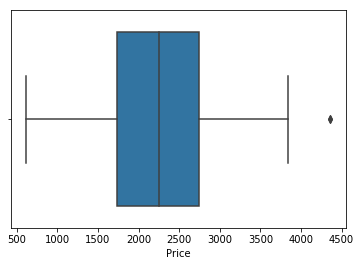

In [13]:
sns.boxplot(data.Price)

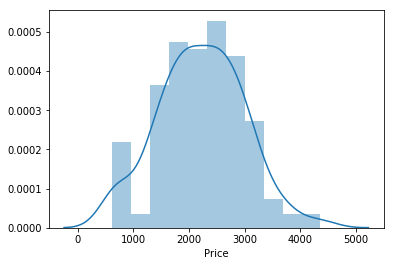

In [14]:
sns.distplot(data.Price)

Indipendent Variables

In [15]:
data.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

Product_id

Data Type
 int64
Unique Datas
 [ 203  880   40   99  947  774 1103  289  605  622 1058 1120  187  315
  860  990  104  776   10 1145 1020 1339  662  575  907  162  974  739
  738  804   43 1248   93  563  577  218   56  198   14  857  937   66
 1221 1011 1026 1216  237  763  131 1062  841 1143  183 1080  827  133
  832  637   64   30  409  143  798  460 1327 1198 1112  696 1089  497
  301  377  701 1161   32 1137  851  826  290 1131 1206 1296  856]
Describing the data
 count     161.000000
mean      675.559006
std       410.851583
min        10.000000
25%       237.000000
50%       774.000000
75%      1026.000000
max      1339.000000
Name: Product_id, dtype: float64


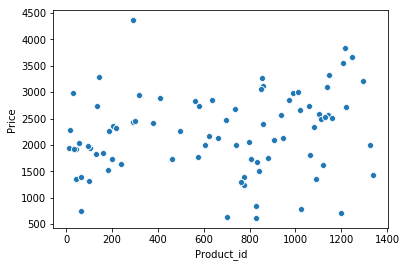

correlation
 [[1.         0.16513581]
 [0.16513581 1.        ]]


In [16]:
print("Data Type\n",data["Product_id"].dtype)
print("Unique Datas\n",data["Product_id"].unique())
print("Describing the data\n",data["Product_id"].describe())

sns.scatterplot(x="Product_id",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["Product_id"],data.Price))

In [18]:
data.drop("Product_id",axis=1,inplace=True)

In [19]:
data.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Sale

Data Type
 int64
Unique Datas
 [  10   11   12   13   14   15   16   17   19   20   21   22   23   24
   25   26   30   31   32   34   35   36   37   38   40   41   42   43
   45   52   57   58   66   67   71   72   73   75   82   87   89   91
   93   94   96   98  100  101  103  106  109  111  113  114  119  121
  140  141  143  156  164  166  178  179  187  198  201  204  206  208
  213  214  256  268  285  299  302  307  308  309  344  367  373  378
  382  385  393  399  418  423  427  455  456  499  523  564  567  599
  615  616  678  996 1009 1043 1224 1274 1530 1584 1781 1862 2071 2088
 2106 2159 2171 2173 3248 3291 3619 4408 4638 8016 8809 8946 9807]
Describing the data
 count     161.000000
mean      621.465839
std      1546.618517
min        10.000000
25%        37.000000
50%       106.000000
75%       382.000000
max      9807.000000
Name: Sale, dtype: float64


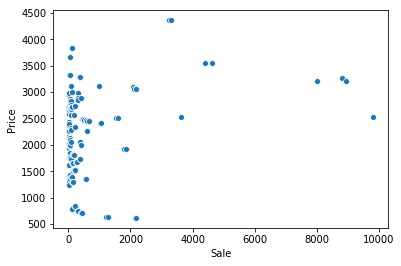

correlation
 [[1.         0.27326252]
 [0.27326252 1.        ]]


In [20]:
print("Data Type\n",data["Sale"].dtype)
print("Unique Datas\n",data["Sale"].unique())
print("Describing the data\n",data["Sale"].describe())

sns.scatterplot(x="Sale",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["Sale"],data.Price))

In [44]:
data.drop("Sale",axis=1,inplace=True)

In [45]:
data.columns

Index(['Price', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Weight

Data Type
 float64
Unique Datas
 [135.  125.  110.  118.5 150.  134.1 145.  162.  161.  140.  174.  141.
 168.  147.  152.  139.2 146.  118.  144.  151.  120.  489.  133.5 169.
 131.  260.  154.  175.  158.   97.  310.  128.  116.  153.  279.  156.
 171.   66.  167.8 404.  127.9 393.  134.  187.  160.   78.4 142.   77.9
 149.  170.  194.8 753.  165.  112.  183.  102.9 179.  180.   69.8 238.
 202.  178. ]
Describing the data
 count    161.000000
mean     170.426087
std       92.888612
min       66.000000
25%      134.100000
50%      153.000000
75%      170.000000
max      753.000000
Name: weight, dtype: float64


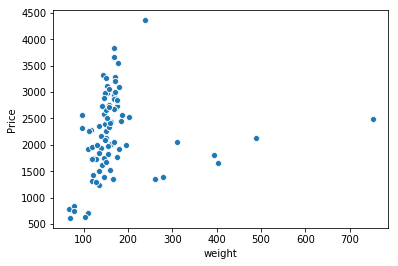

correlation
 [[1.         0.14455512]
 [0.14455512 1.        ]]


In [22]:
print("Data Type\n",data["weight"].dtype)
print("Unique Datas\n",data["weight"].unique())
print("Describing the data\n",data["weight"].describe())

sns.scatterplot(x="weight",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["weight"],data.Price))

In [47]:
data.drop("weight",axis=1,inplace=True)

In [48]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Resoloution

Data Type
 float64
Unique Datas
 [ 5.2   4.    4.7   5.5   5.1   5.3   5.    5.6   5.7  10.1   4.5   7.
  5.15  4.8   8.    1.5   5.43  6.    2.4   2.2  12.2   4.66  1.4   5.46]
Describing the data
 count    161.000000
mean       5.209938
std        1.509953
min        1.400000
25%        4.800000
50%        5.150000
75%        5.500000
max       12.200000
Name: resoloution, dtype: float64


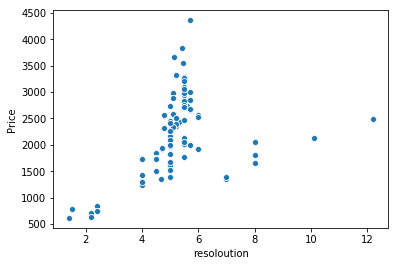

correlation
 [[1.         0.40400956]
 [0.40400956 1.        ]]


In [24]:
print("Data Type\n",data["resoloution"].dtype)
print("Unique Datas\n",data["resoloution"].unique())
print("Describing the data\n",data["resoloution"].describe())

sns.scatterplot(x="resoloution",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["resoloution"],data.Price))

In [49]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

PPI

Data Type
 int64
Unique Datas
 [424 233 312 401 432 277 200 294 524 441 534 282 577 469 220 187 428 386
 224 178 218 515 245 170 306 283 121 541 160 235 189 221 367 166 440 513
 167 403 258 128 247 184 806 129 538]
Describing the data
 count    161.000000
mean     335.055901
std      134.826659
min      121.000000
25%      233.000000
50%      294.000000
75%      428.000000
max      806.000000
Name: ppi, dtype: float64


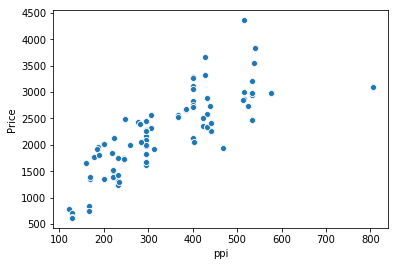

correlation
 [[1.         0.81761445]
 [0.81761445 1.        ]]


In [26]:
print("Data Type\n",data["ppi"].dtype)
print("Unique Datas\n",data["ppi"].unique())
print("Describing the data\n",data["ppi"].describe())

sns.scatterplot(x="ppi",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["ppi"],data.Price))

In [50]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Cpu Core

Data Type
 int64
Unique Datas
 [8 2 4 6 1 0]
Describing the data
 count    161.000000
mean       4.857143
std        2.444016
min        0.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cpu core, dtype: float64


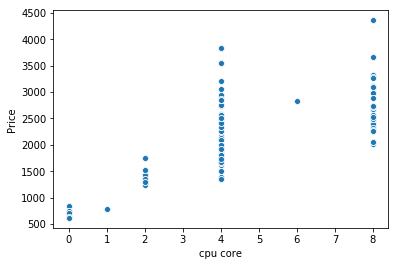

correlation
 [[1.         0.68681064]
 [0.68681064 1.        ]]


In [28]:
print("Data Type\n",data["cpu core"].dtype)
print("Unique Datas\n",data["cpu core"].unique())
print("Describing the data\n",data["cpu core"].describe())

sns.scatterplot(x="cpu core",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["cpu core"],data.Price))

In [51]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Cpu Freq

Data Type
 float64
Unique Datas
 [1.35  1.3   1.2   2.3   2.5   1.5   1.4   2.7   1.875 2.15  1.75  1.55
 1.    2.26  1.8   2.45  1.53  1.83  1.7   2.    0.208 0.    1.25  1.6
 2.1   1.95  1.975 2.2  ]
Describing the data
 count    161.000000
mean       1.502832
std        0.599783
min        0.000000
25%        1.200000
50%        1.400000
75%        1.875000
max        2.700000
Name: cpu freq, dtype: float64


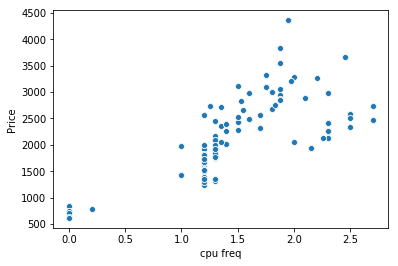

correlation
 [[1.         0.72738283]
 [0.72738283 1.        ]]


In [30]:
print("Data Type\n",data["cpu freq"].dtype)
print("Unique Datas\n",data["cpu freq"].unique())
print("Describing the data\n",data["cpu freq"].describe())

sns.scatterplot(x="cpu freq",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["cpu freq"],data.Price))

In [52]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Internal Mem

Data Type
 float64
Unique Datas
 [1.60e+01 4.00e+00 8.00e+00 3.20e+01 6.40e+01 0.00e+00 1.28e+02 4.00e-03
 1.28e-01 2.56e-01]
Describing the data
 count    161.000000
mean      24.501714
std       28.804773
min        0.000000
25%        8.000000
50%       16.000000
75%       32.000000
max      128.000000
Name: internal mem, dtype: float64


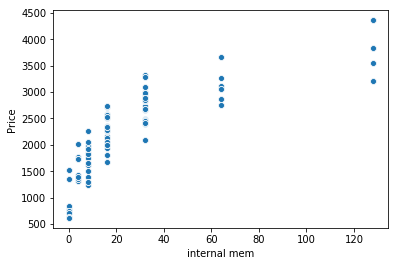

correlation
 [[1.         0.77673777]
 [0.77673777 1.        ]]


In [32]:
print("Data Type\n",data["internal mem"].dtype)
print("Unique Datas\n",data["internal mem"].unique())
print("Describing the data\n",data["internal mem"].describe())

sns.scatterplot(x="internal mem",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["internal mem"],data.Price))

In [53]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Ram

Data Type
 float64
Unique Datas
 [3.00e+00 1.00e+00 1.50e+00 5.12e-01 2.00e+00 4.00e+00 6.00e+00 4.00e-03
 8.00e-03 3.20e-02 0.00e+00 1.28e-01]
Describing the data
 count    161.000000
mean       2.204994
std        1.609831
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: ram, dtype: float64


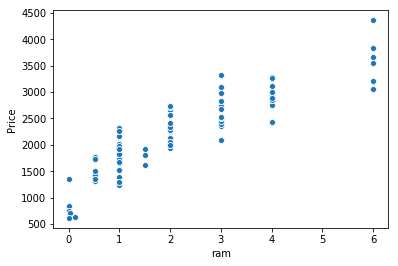

correlation
 [[1.         0.89691507]
 [0.89691507 1.        ]]


In [34]:
print("Data Type\n",data["ram"].dtype)
print("Unique Datas\n",data["ram"].unique())
print("Describing the data\n",data["ram"].describe())

sns.scatterplot(x="ram",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["ram"],data.Price))

In [54]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

RearCam

Data Type
 float64
Unique Datas
 [13.    3.15 16.    2.    5.    8.   12.3  12.   20.7  21.    3.    0.
 10.   20.    4.    1.3  23.   21.5 ]
Describing the data
 count    161.000000
mean      10.378261
std        6.181585
min        0.000000
25%        5.000000
50%       12.000000
75%       16.000000
max       23.000000
Name: RearCam, dtype: float64


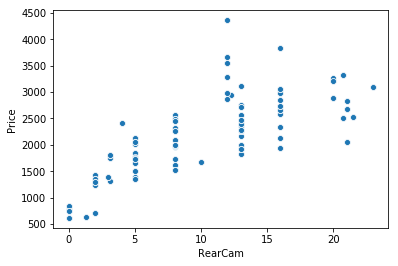

correlation
 [[1.         0.73953757]
 [0.73953757 1.        ]]


In [36]:
print("Data Type\n",data["RearCam"].dtype)
print("Unique Datas\n",data["RearCam"].unique())
print("Describing the data\n",data["RearCam"].describe())

sns.scatterplot(x="RearCam",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["RearCam"],data.Price))

In [55]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Front_Cam

Data Type
 float64
Unique Datas
 [ 8.   0.   5.   2.   3.7  1.2 16.   4.   5.1 13.   0.9  1.   2.1  2.2
 20. ]
Describing the data
 count    161.000000
mean       4.503106
std        4.342053
min        0.000000
25%        0.000000
50%        5.000000
75%        8.000000
max       20.000000
Name: Front_Cam, dtype: float64


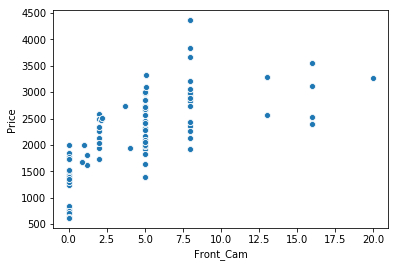

correlation
 [[1.         0.67528641]
 [0.67528641 1.        ]]


In [38]:
print("Data Type\n",data["Front_Cam"].dtype)
print("Unique Datas\n",data["Front_Cam"].unique())
print("Describing the data\n",data["Front_Cam"].describe())

sns.scatterplot(x="Front_Cam",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["Front_Cam"],data.Price))

In [56]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Battery

Data Type
 int64
Unique Datas
 [2610 1700 2000 1400 2500 1560 2800 4000 3000 2040 2300 3450 2900 2200
 1905 2930 3050 1200 7400 2250 2450 1600 3500 2390 2820 3350 3140 2100
 4060 1840 3200 3240  800 3600 4500 1500 4450 1830 1100 2700  850 5000
 3630 1730 3400  900 9500 2600 1900  950 3100 2580 3430 7000 4080]
Describing the data
 count     161.000000
mean     2842.111801
std      1366.990838
min       800.000000
25%      2040.000000
50%      2800.000000
75%      3240.000000
max      9500.000000
Name: battery, dtype: float64


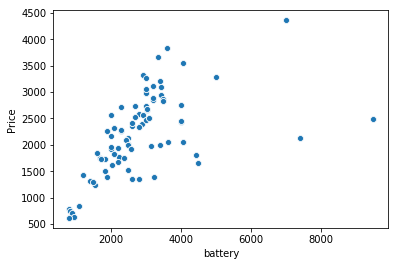

correlation
 [[1.         0.55994569]
 [0.55994569 1.        ]]


In [40]:
print("Data Type\n",data["battery"].dtype)
print("Unique Datas\n",data["battery"].unique())
print("Describing the data\n",data["battery"].describe())

sns.scatterplot(x="battery",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["battery"],data.Price))

In [57]:
data.columns

Index(['Price', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Thickness

Data Type
 float64
Unique Datas
 [ 7.4  9.9  7.6 11.   9.5 11.7  8.1  7.7  8.9  8.2  8.3 10.   8.5  7.9
 10.3  8.8  6.4  6.9  5.9  9.8  7.8  9.2 10.1  8.7  7.5 12.3  9.1  9.3
  5.1  7.3  9.  13.2 10.6  8.4  9.7 10.8 12.9  8.  12.4  7.  10.9 10.2
 15.6 11.6  6.3  9.4 18.5 14.1  6.8]
Describing the data
 count    161.000000
mean       8.921739
std        2.192564
min        5.100000
25%        7.600000
50%        8.400000
75%        9.800000
max       18.500000
Name: thickness, dtype: float64


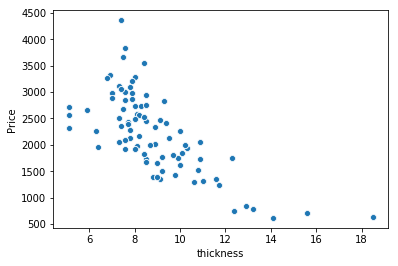

correlation
 [[ 1.         -0.71677306]
 [-0.71677306  1.        ]]


In [42]:
print("Data Type\n",data["thickness"].dtype)
print("Unique Datas\n",data["thickness"].unique())
print("Describing the data\n",data["thickness"].describe())

sns.scatterplot(x="thickness",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["thickness"],data.Price))

In [59]:
X=data.drop("Price",axis=1)
X.head()

,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [60]:
y=data.Price
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((128, 10), (33, 10), (128,), (33,))

In [63]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 166.48026911100868
Test RMSE = 177.24593214339149
Train R2_square = 0.9522051103136218
Test R2_square = 0.9484259951293531


In [64]:
DR=DecisionTreeRegressor(min_samples_leaf= 1,max_depth=11,max_features="auto")
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 48.36916122464558
Train R2_square = 1.0
Test R2_square = 0.9961592555113611


In [65]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 67.24505209493114
Test RMSE = 144.332859191607
Train R2_square = 0.9922021191702233
Test R2_square = 0.9658013680471865
